In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("./input_data/close_prices.csv")

In [3]:
df.head()

,date,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,PFE,PG,T,TRV,UNH,UTX,V,VZ,WMT,XOM
0,2013-09-23,76.440002,117.510002,85.029999,24.270000,125.519997,59.409999,64.750000,24.280001,165.250000,...,28.799999,79.279999,34.220001,86.379997,71.820000,109.419998,196.240005,47.980000,76.419998,87.750000
1,2013-09-24,76.070000,119.000000,85.110001,24.139999,124.489998,59.319997,64.320000,24.320000,162.970001,...,28.709999,78.620003,34.090000,85.870003,72.320000,110.000000,193.339996,47.270000,75.750000,87.360001
2,2013-09-25,75.989998,118.510002,84.500000,24.430000,124.070000,59.319997,64.449997,24.230000,162.309998,...,28.490000,77.720001,34.049999,85.980003,71.980003,109.260002,191.559998,46.950001,74.650002,87.139999
3,2013-09-26,76.320000,119.379997,84.199997,23.770000,123.489998,59.509996,65.239998,24.250000,162.289993,...,28.520000,78.050003,34.230000,85.830002,72.160004,109.660004,193.559998,47.669998,74.620003,87.070000
4,2013-09-27,75.889999,118.739998,83.800003,23.330000,122.639999,59.009995,65.190002,24.049999,159.850006,...,28.879999,77.209999,33.980000,85.410004,71.989998,109.360001,193.050003,47.000000,74.360001,86.900002


In [4]:
X = df.copy().drop(columns = ["date"])

In [5]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
expl_ratio = pca.explained_variance_ratio_

Text(0, 0.5, 'dispersion')

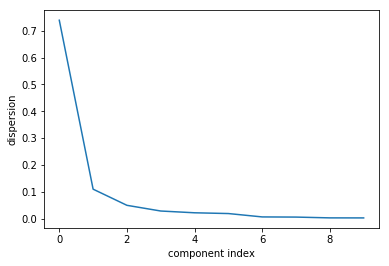

In [7]:
plt.plot(expl_ratio)
plt.xlabel("component index")
plt.ylabel("dispersion")

In [8]:
idx, out = 0, 0
while out < 0.9:
    out += expl_ratio[idx]
    idx += 1

In [9]:
w = open("./week4/variance.dat", "w")
w.write(f"{idx}")
w.close()

In [10]:
component = pca.transform(X).T[0]

In [11]:
df_index = pd.read_csv("./input_data/djia_index.csv")
df_index.head()

,date,^DJI
0,2013-09-23,15401.379883
1,2013-09-24,15334.589844
2,2013-09-25,15273.259766
3,2013-09-26,15328.299805
4,2013-09-27,15258.240234


In [12]:
y = df_index["^DJI"]

In [13]:
out = np.corrcoef(component, y)[0][-1]

In [14]:
w = open("./week4/correlation.dat", "w")
w.write(f"{np.round(out, 2)}")
w.close()

In [15]:
idx_max = np.argmax(np.abs(pca.components_[0]))

In [16]:
tmp = X.columns[idx_max]
out = "".join([s if i>0 else s.upper() for i,s in enumerate(tmp)])

In [17]:
w = open("./week4/company.dat", "w")
w.write(out)
w.close()